# Monthly Total Precipitation Climatology (1979-2022) Using ERA5 Reanalysis Data
## Tehreem Qureshi, CLIM680
### See below for a multi-panel plot of 12 month climatologies (1979-2022) of total precipitation in meters. My dataset is from ERA5 Reanalysis, and I download and concatenate yearly daily sum files (which is the resolution I use for my research), resample into monthly resolution sums, and use grouby and means to obtain and plot climatologies. Note that I have commented out the code I used for preprocessing monthly data but included it to show progress.  

In [28]:
import xarray as xr
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [29]:
# files = ('precip_daily_sum*.nc') # daily era5 precip values from 1979-2022
# precip_ds_daily = xr.open_mfdataset(files, combine="by_coords", engine="netcdf4",  decode_times=True)
# precip_ds_daily # combine into one big netcdf file from 1970-2022 daily precip sums
# resample into monthly values using built in resample method -> output monthly sums of precip
# precip_ds_monthly = precip_ds_daily.tp.resample(valid_time='1MS').sum()
# precip_ds_monthly
# precip_ds_monthly.to_netcdf('monthly_precip_sum.nc') # output into .nc file to be in current directory
# resample into monthly values using built in resample method -> output monthly sums of precip
# precip_ds_monthly = precip_ds_daily.tp.resample(valid_time='1MS').sum()
# precip_ds_monthly
# precip_ds_monthly.to_netcdf('monthly_precip_sum.nc') # output into .nc file to be in current directory

In [33]:
filename = '/scratch/tquresh/clim680/monthly_precip_sum.nc' # monthly values of total precipitation (m) from 1979-2022
monthly_precip19792022 = xr.open_dataset(filename)
monthly_precip19792022 # open.nc file to ensure it works

<xarray.Dataset> Size: 2GB
Dimensions:     (latitude: 721, longitude: 1440, valid_time: 528)
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01 ... 2022-12-01
Data variables:
    tp          (valid_time, latitude, longitude) float32 2GB ...

In [34]:
monthlyprecip_clim = monthly_precip19792022.groupby('valid_time.month').mean() # groupby month and take mean along time dimension, equating to monthly 1979-2022 climatology
monthlyprecip_clim # ensure we have monthly clims

<xarray.Dataset> Size: 50MB
Dimensions:    (month: 12, latitude: 721, longitude: 1440)
Coordinates:
    number     int64 8B 0
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tp         (month, latitude, longitude) float32 50MB 0.01404 ... 0.00333

/tmp/ipykernel_649651/2579751740.py:19: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in fg.axes.flat:


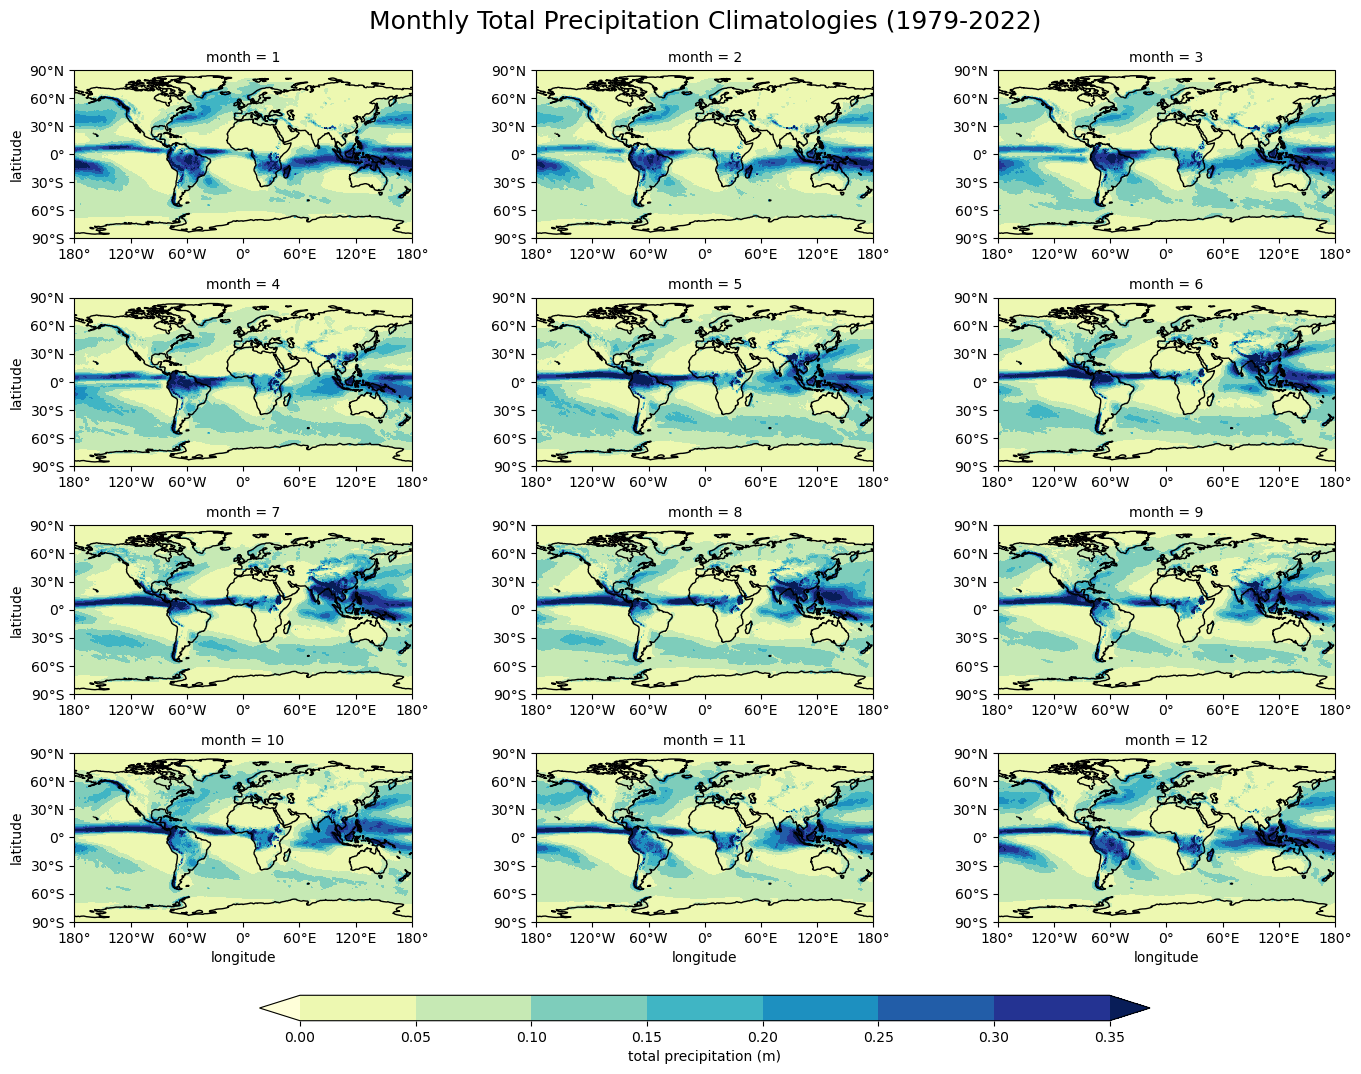

In [49]:
# below plots monthly climatologies using faceting example from class
fg = monthlyprecip_clim['tp'].plot.contourf(
    row='month', # each subplot represents a month
    col_wrap=3, # use three columns to space out evenly 
    robust=True,
    cmap='YlGnBu', # selected colormap after analyzing NOAA Climate maps; viridis was not as clear due to units of meters
    extend='both',
    subplot_kws={"projection": ccrs.PlateCarree()}, # projection  
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.65, # make colorbar slightly smaller
        "aspect": 35,
        "pad": .05,
        "label": "total precipitation (m)",
    },
    figsize=(14, 12) # larger plots 
)

for ax in fg.axes.flat:
    ax.coastlines()
    
    ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)

plt.subplots_adjust( # figures overlapping quite a bit in the original so adjust spacing
    top=0.93,   
    bottom=0.22,
    hspace=0.35,   
)
plt.suptitle("Monthly Total Precipitation Climatologies (1979-2022)", fontsize=18)
plt.show()